In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('lymphography.csv')

In [3]:
df.head()

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [4]:
df.columns = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in']

In [5]:
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [6]:

X = df.iloc[:,1:-1]
y = df.iloc[:,0]

In [63]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)# 
X,y =  ros.fit_resample(X,y)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, shuffle=True)

In [65]:
X_train.shape

(259, 17)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train.shape

(259, 17)

In [68]:
X_test.shape

(65, 17)

In [69]:
import tensorflow as tf
labels_train = tf.one_hot(y_train, depth=3)
labels_test = tf.one_hot(y_test, depth=3)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [71]:
classifier = Sequential()

In [72]:
# Adding input layer
classifier.add(Dense(units=17,activation='tanh'))

In [73]:
# Adding 1st hiddent layer
classifier.add(Dense(units=13,activation='tanh'))

In [74]:
classifier.add(Dense(units=10,activation='tanh'))

In [75]:
classifier.add(Dense(units=7,activation='tanh'))

In [76]:
# Output layer
classifier.add(Dense(3,activation='softmax'))

In [77]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [79]:
model_history = classifier.fit(X_train,labels_train,validation_data=(X_test, labels_test), batch_size=8,epochs=100)

Epoch 1/100
33/33 [==============================] - 1s 6ms/step - loss: 0.3681 - accuracy: 0.4556 - val_loss: 0.3726 - val_accuracy: 0.4615
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.4788 - val_loss: 0.2879 - val_accuracy: 0.5077
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.4749 - val_loss: 0.2269 - val_accuracy: 0.5231
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.4710 - val_loss: 0.2144 - val_accuracy: 0.5385
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.4788 - val_loss: 0.1872 - val_accuracy: 0.5231
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.4826 - val_loss: 0.1678 - val_accuracy: 0.5385
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.4826 - val_loss: 0.1514 - val_accuracy: 0.5538
Epoch 8/100
3

Epoch 59/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.4865 - val_loss: 0.0821 - val_accuracy: 0.5538
Epoch 60/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.4865 - val_loss: 0.0823 - val_accuracy: 0.5538
Epoch 61/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.4865 - val_loss: 0.0824 - val_accuracy: 0.5538
Epoch 62/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.4865 - val_loss: 0.0788 - val_accuracy: 0.5538
Epoch 63/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.4865 - val_loss: 0.0813 - val_accuracy: 0.5538
Epoch 64/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.4865 - val_loss: 0.0810 - val_accuracy: 0.5538
Epoch 65/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.4865 - val_loss: 0.0821 - val_accuracy: 0.5538
Epoch 

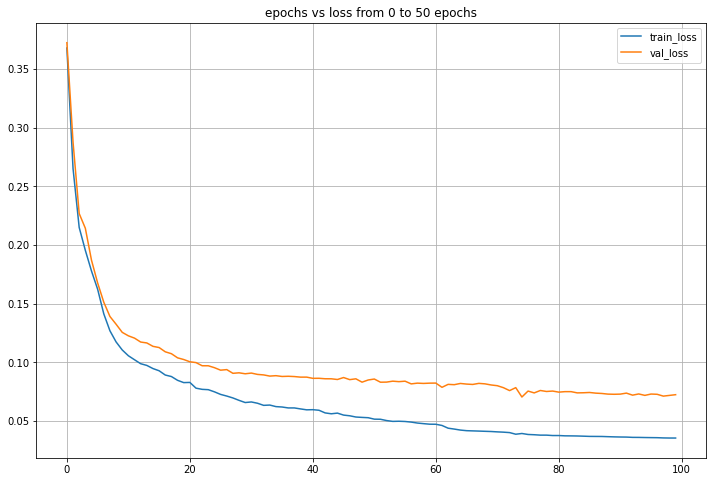

In [80]:
from matplotlib import pyplot as plt

epochs = [i for i in range(0, len(model_history.history['loss']))]
plt.figure(figsize=(12,8))
plt.plot(epochs, model_history.history['loss'], label='train_loss')
plt.plot(epochs, model_history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.title('epochs vs loss from 0 to 50 epochs')
plt.show()

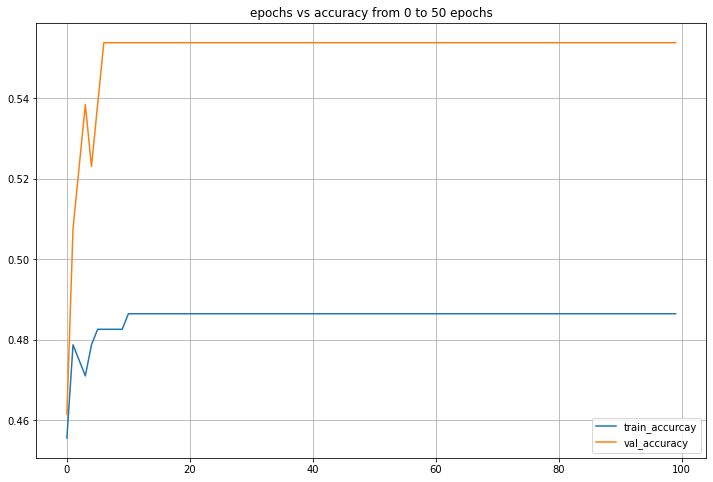

In [81]:
epochs = [i for i in range(0, len(model_history.history['loss']))]
plt.figure(figsize=(12,8))
plt.plot(epochs, model_history.history['accuracy'], label='train_accurcay')
plt.plot(epochs, model_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('epochs vs accuracy from 0 to 50 epochs')
plt.show()

In [87]:
inputs = tf.keras.Input(shape=(17,))
x = tf.keras.layers.Dense(15, activation="tanh")(inputs)
x = tf.keras.layers.Dense(12, activation="tanh")(x)
x = tf.keras.layers.Dense(7, activation="tanh")(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_28 (Dense)            (None, 15)                270       
                                                                 
 dense_29 (Dense)            (None, 12)                192       
                                                                 
 dense_30 (Dense)            (None, 7)                 91        
                                                                 
 dense_31 (Dense)            (None, 3)                 24        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [88]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [89]:
#fitting the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,  name='Adam')

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

process = model.fit(X_train, labels_train, epochs=100, validation_data=(X_test, labels_test), batch_size=32)

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 0.2866 - accuracy: 0.6525 - val_loss: 0.2942 - val_accuracy: 0.7385
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.7181 - val_loss: 0.2359 - val_accuracy: 0.8000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1804 - accuracy: 0.7683 - val_loss: 0.1866 - val_accuracy: 0.8154
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1470 - accuracy: 0.7490 - val_loss: 0.1644 - val_accuracy: 0.7538
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.6332 - val_loss: 0.1325 - val_accuracy: 0.6308
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1003 - accuracy: 0.6178 - val_loss: 0.1286 - val_accuracy: 0.6462
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.5174 - val_loss: 0.1241 - val_accuracy: 0.5692
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.4865 - val_loss: 0.1132 - val_accuracy: 0.5538
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.4865 - val_loss: 0.1133 - val_accuracy: 0.5538
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.4865 - val_loss: 0.1131 - val_accuracy: 0.5538
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.4865 - val_loss: 0.1120 - val_accuracy: 0.5538
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.4865 - val_loss: 0.1112 - val_accuracy: 0.5538
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.4865 - val_loss: 0.1112 - val_accuracy: 0.5538
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 0.4865 - val_loss: 0.1150 - val_accuracy: 0.5538
Epoch 66/100
9/9 [===============

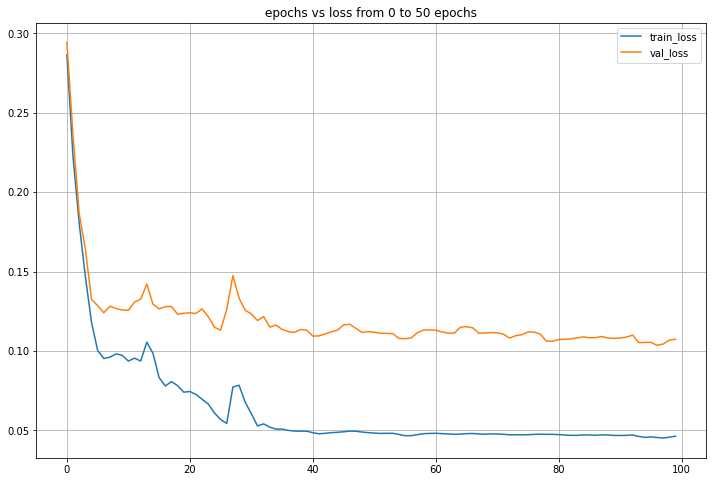

In [90]:
from matplotlib import pyplot as plt

epochs = [i for i in range(0, len(process.history['loss']))]
plt.figure(figsize=(12,8))
plt.plot(epochs, process.history['loss'], label='train_loss')
plt.plot(epochs, process.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.title('epochs vs loss from 0 to 50 epochs')
plt.show()

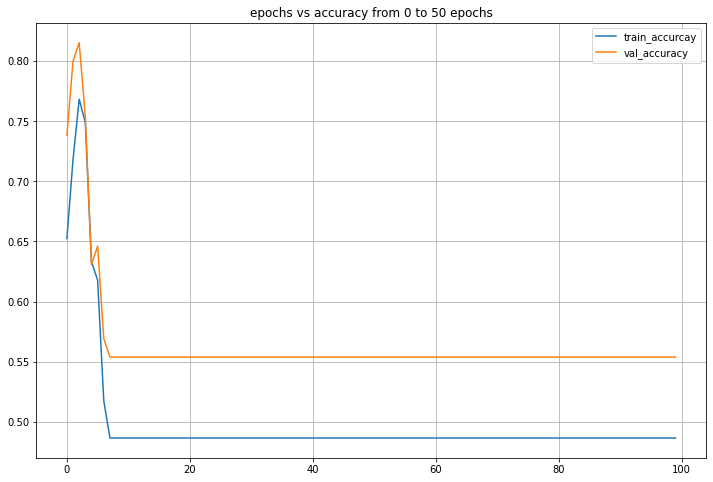

In [91]:
epochs = [i for i in range(0, len(process.history['loss']))]
plt.figure(figsize=(12,8))
plt.plot(epochs, process.history['accuracy'], label='train_accurcay')
plt.plot(epochs, process.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('epochs vs accuracy from 0 to 50 epochs')
plt.show()